In [34]:
from sklearn.datasets import load_digits
import numpy as np
np.set_printoptions(legacy='1.25')
digits = load_digits()

In [ ]:

print(digits.DESCR)

In [36]:
digits.target.shape

(1797,)

In [37]:
digits.data.shape

(1797, 64)

In [38]:
digits.images.shape

(1797, 8, 8)

1


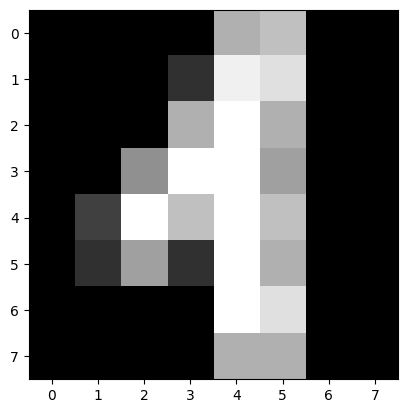

In [39]:
import matplotlib.pyplot as plt

x = digits.images[200]

print(digits.target[200])
plt.gray()
plt.imshow(x)
plt.show()

# Preprocess

In [40]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(digits.data, digits.target , test_size=0.3)

In [41]:
X_train[3]

array([ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10.,
       16.,  0.,  0.,  0.,  6.,  9.,  0.,  6., 15.,  0.,  0.,  0.,  0.,
        0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
        0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16.,
       11., 16.,  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.])

# Normilize

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape ,X_test.shape

((1257, 64), (540, 64))

# PCA

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [59]:
X_train.shape ,X_test.shape

((1257, 32), (540, 32))

# Classication

In [45]:
def calculate_metric(y_train, y_test, y_pred_train, y_pred_test):
    from sklearn.metrics import accuracy_score,precision_score,recall_score

    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p= precision_score(y_true=y_test, y_pred=y_pred_test, average="weighted")
    r=recall_score(y_true=y_test, y_pred=y_pred_test, average="weighted")

    print(f"acc_train : {acc_train} - acc_test : {acc_test} - precision : {p} - recall : {r}")

    return acc_train, acc_test, p, r

## 1.Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=256 , max_depth=128)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [62]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)


acc_train : 1.0 - acc_test : 0.9666666666666667 - precision : 0.9672225815903978 - recall : 0.9666666666666667


## 2.SVM

In [63]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")
svm.fit(X_train , y_train)

SVC(kernel='poly')

In [64]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9992044550517104 - acc_test : 0.987037037037037 - precision : 0.9870668892936652 - recall : 0.987037037037037


## 3.ANN

In [65]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, solver="lbfgs", learning_rate="adaptive")

ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=256, learning_rate='adaptive', solver='lbfgs')

In [66]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 1.0 - acc_test : 0.9574074074074074 - precision : 0.9578095945618837 - recall : 0.9574074074074074


## 4.KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [68]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metric(y_train, y_test, y_pred_train, y_pred_test)

acc_train : 0.9856801909307876 - acc_test : 0.9777777777777777 - precision : 0.9782784170545535 - recall : 0.9777777777777777


## Comparision

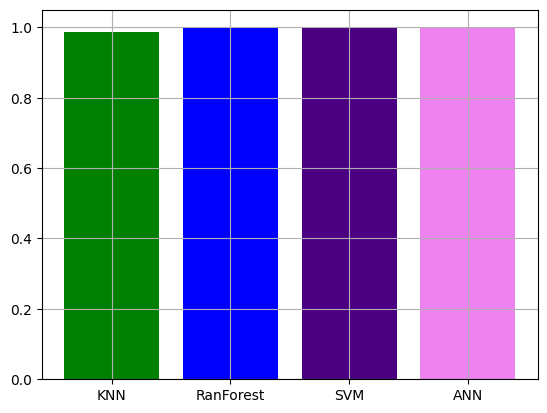

In [69]:
import matplotlib.pyplot as plt

acc_train=[ acc_train_knn,  acc_train_rf, acc_train_svm, acc_train_ann]
title = ["KNN" , "RanForest" , "SVM" , "ANN"]
colors=["green", "blue", "indigo", "violet"]

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

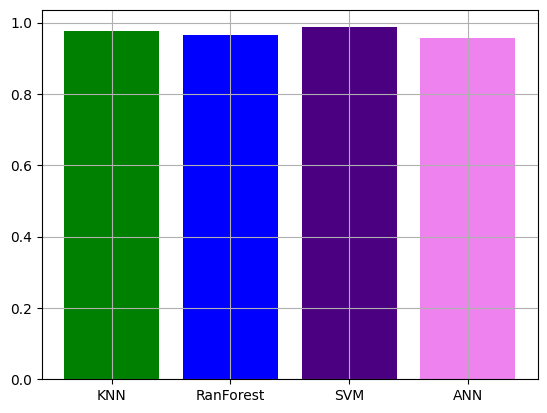

: 

In [ ]:
acc_test=[ acc_test_knn,  acc_test_rf, acc_test_svm, acc_test_ann]
title = ["KNN" , "RanForest" , "SVM" , "ANN"]
colors=["green", "blue", "indigo", "violet"]

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

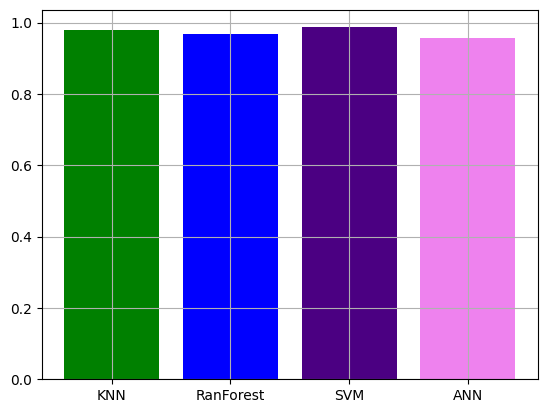

In [73]:
p=[ p_knn,  p_rf, p_svm, p_ann]
title = ["KNN" , "RanForest" , "SVM" , "ANN"]
colors=["green", "blue", "indigo", "violet"]

plt.bar(title,p, color=colors)
plt.grid()
plt.show()

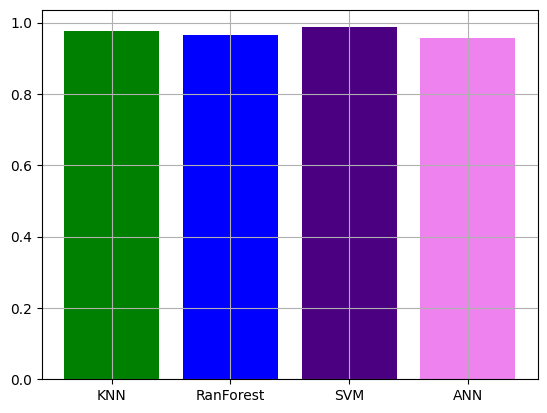

In [72]:
r=[ r_knn,  r_rf, r_svm, r_ann]
title = ["KNN" , "RanForest" , "SVM" , "ANN"]
colors=["green", "blue", "indigo", "violet"]

plt.bar(title,r, color=colors)
plt.grid()
plt.show()